## HW1 Problem 3
## Name: Abhishek Samal

### Imports

In [109]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

### 1. Loading the data set

#### a.

In [110]:
df = pd.read_csv("data.csv")

#### b.

In [111]:
print('Number of columns in the dataframe is : ', len(df.columns))
print('No, the columns number does not match to the dataset description, as the online summary says that theres are only 32 columns, but here we can see after importing that there are 33 columns.')

Number of columns in the dataframe is :  33
No, the columns number does not match to the dataset description, as the online summary says that theres are only 32 columns, but here we can see after importing that there are 33 columns.


#### c. 

In [122]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


### 2. Matrix scatter plot

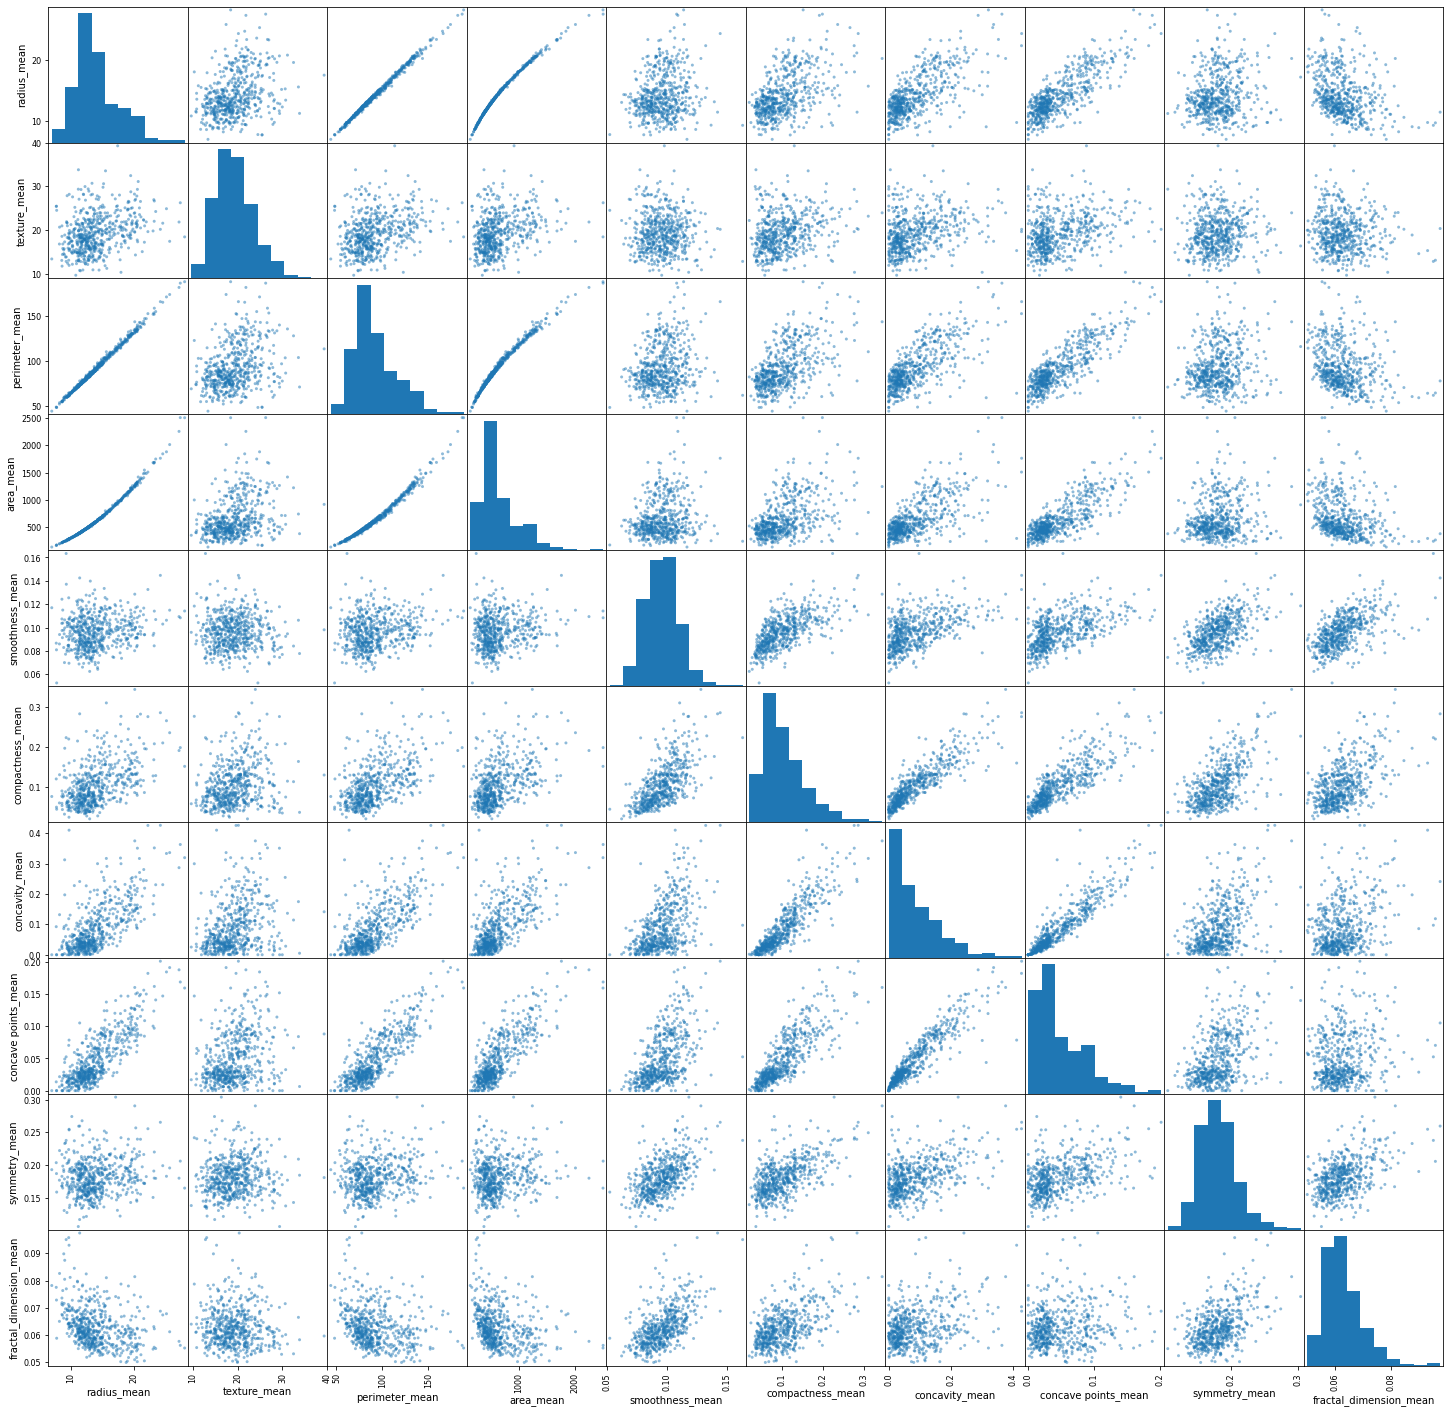

In [113]:
pd.plotting.scatter_matrix(df.iloc[:,2:12])
plt.gcf().set_size_inches(25,25)

### 3. Calculations
#### a.

In [114]:
x = df.iloc[:,1].value_counts()
print('Number of Benign cases:',x[0])
print('Number of Malignant case:',x[1])

Number of Benign cases: 357
Number of Malignant case: 212


#### b.

In [115]:
attributes=df.iloc[:,2:12]   
print('Mean of each attribute is: \n', np.mean(attributes))
print('\n')
print('Standard Deviation of each attribute is: \n', np.std(attributes))

Mean of each attribute is: 
 radius_mean                14.127292
texture_mean               19.289649
perimeter_mean             91.969033
area_mean                 654.889104
smoothness_mean             0.096360
compactness_mean            0.104341
concavity_mean              0.088799
concave points_mean         0.048919
symmetry_mean               0.181162
fractal_dimension_mean      0.062798
dtype: float64


Standard Deviation of each attribute is: 
 radius_mean                 3.520951
texture_mean                4.297255
perimeter_mean             24.277619
area_mean                 351.604754
smoothness_mean             0.014052
compactness_mean            0.052766
concavity_mean              0.079650
concave points_mean         0.038769
symmetry_mean               0.027390
fractal_dimension_mean      0.007054
dtype: float64


#### c.

In [116]:
diagnosis=df.iloc[:,1]  
malignant_group = attributes[diagnosis == 'M']
benign_group = attributes[diagnosis == 'B']

print('Mean of each Malignant group is: \n', np.mean(malignant_group))
print('\n')
print('Mean of each Benign group is: \n', np.mean(benign_group))
print('\n')
print('Standard Deviation of each Malignant group is: \n', np.std(malignant_group))
print('\n')
print('Standard Deviation of each Benign Group is: \n', np.std(benign_group))

Mean of each Malignant group is: 
 radius_mean                17.462830
texture_mean               21.604906
perimeter_mean            115.365377
area_mean                 978.376415
smoothness_mean             0.102898
compactness_mean            0.145188
concavity_mean              0.160775
concave points_mean         0.087990
symmetry_mean               0.192909
fractal_dimension_mean      0.062680
dtype: float64


Mean of each Benign group is: 
 radius_mean                12.146524
texture_mean               17.914762
perimeter_mean             78.075406
area_mean                 462.790196
smoothness_mean             0.092478
compactness_mean            0.080085
concavity_mean              0.046058
concave points_mean         0.025717
symmetry_mean               0.174186
fractal_dimension_mean      0.062867
dtype: float64


Standard Deviation of each Malignant group is: 
 radius_mean                 3.196406
texture_mean                3.770546
perimeter_mean             21.803048

#### d.

In [117]:
x = attributes[(df.iloc[:,2] >= 15)&(diagnosis == 'B')].count()/attributes[(diagnosis == 'B')].count()
print(100*x[1],'% of Benign tumors having a radius of at least 15um')

3.6414565826330536 % of Benign tumors having a radius of at least 15um


### 4. OLS
#### a.

In [118]:
X = df.iloc[:,2].to_numpy()
Y = df.iloc[:,5].to_numpy()

A_order_1 = np.transpose([X,np.ones(len(X))])
A_inv = np.linalg.pinv(A_order_1)
coef_order_1 = np.matmul(A_inv, Y)
print(coef_order_1)
residual_1 = sum((np.dot(A_order_1,coef_order_1)-Y)**2)
print(residual_1)

[  98.59821922 -738.0367042 ]
1767428.9562542252


#### b.

In [119]:
A_order_2 = np.transpose([X**2,X,np.ones(len(X))])
A_inv = np.linalg.pinv(A_order_2)
coef_order_2 = np.matmul(A_inv, Y)
print(coef_order_2)
residual_2 = sum((np.dot(A_order_2,coef_order_2)-Y)**2)
print(residual_2)

[  3.10992516   0.43684601 -10.5164038 ]
123097.70230710601


### 5. Plots
#### a.

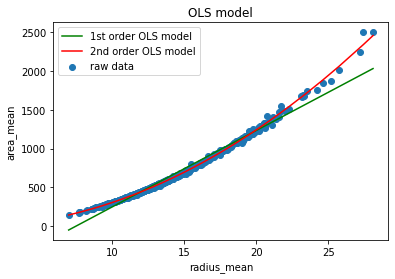

In [120]:
ax = plt.axes()
ax.scatter(X,Y, label='raw data')
ax.plot(np.sort(X),np.sort(np.dot(A_order_1,coef_order_1)), '-g', label='1st order OLS model')
ax.plot(np.sort(X),np.sort(np.dot(A_order_2,coef_order_2)),'-r', label='2nd order OLS model')
ax.set(xlabel='radius_mean', ylabel='area_mean' ,title='OLS model');
ax.legend()
plt.show()

####  b.

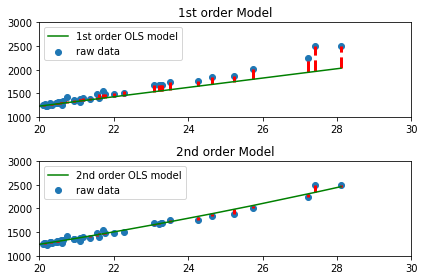

In [121]:
plt.subplot(211)
plt.plot(np.sort(X),np.sort(np.dot(A_order_1,coef_order_1)), '-g', label='1st order OLS model')
plt.scatter(X,Y, label='raw data')
plt.vlines(np.sort(X), np.sort(np.dot(A_order_1,coef_order_1)),np.sort(Y), lw=3,colors='red',linestyles='dashed')
ax_1 = plt.gca()
ax_1.set(xlim=(20, 30),ylim=(1000, 3000),title='1st order Model');
fig=plt.gcf()
fig.tight_layout()
ax_1.legend()

plt.subplot(212)
plt.plot(np.sort(X),np.sort(np.dot(A_order_2,coef_order_2)),'-g', label='2nd order OLS model')
plt.scatter(X,Y, label='raw data')
plt.vlines(np.sort(X), np.sort(np.dot(A_order_2,coef_order_2)),np.sort(Y), lw=3,colors='red',linestyles='dashed')
ax_2 = plt.gca()
ax_2.set(xlim=(20, 30),ylim=(1000, 3000),title='2nd order Model');
fig=plt.gcf()
fig.tight_layout()
ax_2.legend()
plt.show()